In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the data
df_train= pd.read_csv("Data/ParisHousing_train_data.csv")
df_test= pd.read_csv("Data/ParisHousing_test_data.csv")


#split
df_train_x =df_train.drop(columns=['price'])  
df_train_y=df_train['price'] 

df_test_x= df_test.drop(columns=['price'])  
df_test_y = df_test['price'] 

X_train, X_val, y_train, y_val = train_test_split(df_train_x, df_train_y, test_size=0.2, random_state=42)

In [3]:
# Ensure reproducibility
tf.random.set_seed(42)

In [4]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(df_train_x.shape[1],)), 
    Dense(32, activation='relu'),                                        
    Dense(1)                                                              
])

In [5]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])

In [6]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=250, 
    batch_size=32,
    verbose=1
)

Epoch 1/250
200/200 [==============================] - 0s 2ms/step - loss: 33479481884672.0000 - mae: 5034416.0000 - mse: 33479481884672.0000 - val_loss: 31777070514176.0000 - val_mae: 4833894.0000 - val_mse: 31777070514176.0000
Epoch 2/250
200/200 [==============================] - 0s 873us/step - loss: 33476050944000.0000 - mae: 5034130.0000 - mse: 33476050944000.0000 - val_loss: 31770361724928.0000 - val_mae: 4833328.5000 - val_mse: 31770361724928.0000
Epoch 3/250
200/200 [==============================] - 0s 891us/step - loss: 33463382048768.0000 - mae: 5033101.0000 - mse: 33463382048768.0000 - val_loss: 31752118599680.0000 - val_mae: 4831830.0000 - val_mse: 31752118599680.0000
Epoch 4/250
200/200 [==============================] - 0s 1ms/step - loss: 33435861123072.0000 - mae: 5030911.5000 - mse: 33435861123072.0000 - val_loss: 31717794512896.0000 - val_mae: 4829050.0000 - val_mse: 31717794512896.0000
Epoch 5/250
200/200 [==============================] - 0s 1ms/step - loss: 33389

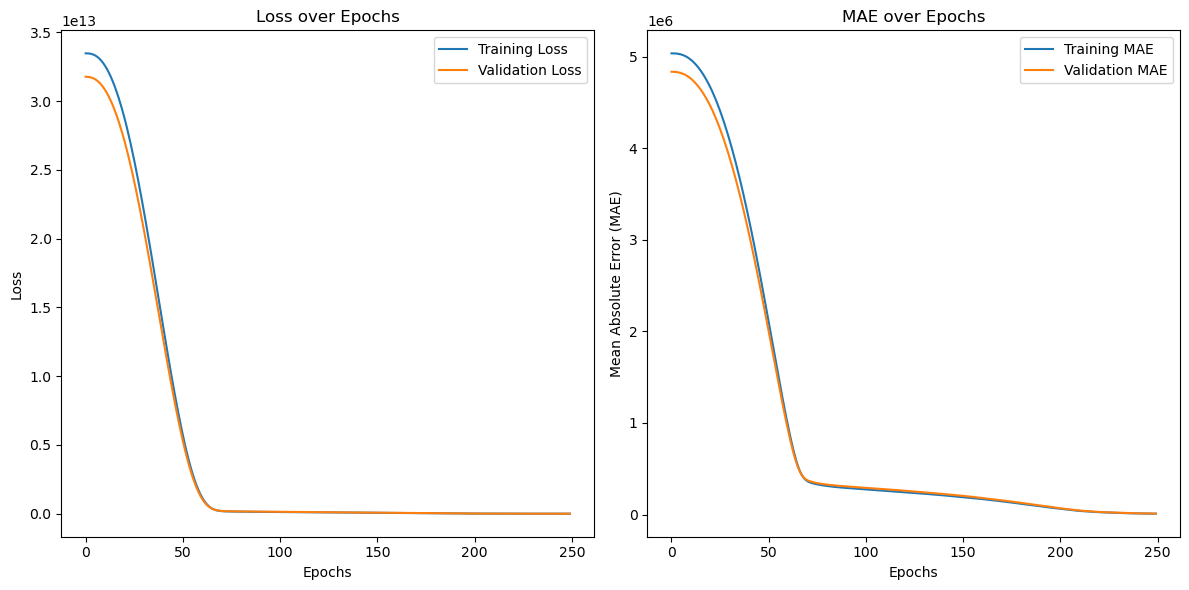

In [ ]:
# Plot loss over epochs
plt.figure(figsize=(12, 6))

# LOss over train and validation
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Make predictions
y_pred_test = model.predict(df_test_x).flatten()
y_pred_val = model.predict(X_val).flatten()


In [9]:
# Evaluate the model

mse_test = mean_squared_error(df_test_y, y_pred_test)
mae_test = mean_absolute_error(df_test_y, y_pred_test)
mape_test = np.mean(np.abs((df_test_y - y_pred_test) / df_test_y)) * 100

mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100

# Print results
print("\nEvaluation on the test set:")
print("MSE (Mean Squared Error):", mse_test)
print("MAE (Mean Absolute Error):", mae_test)
print("MAPE (Mean Absolute Percentage Error):", mape_test, "%")

print("\nEvaluation on the validation set:")
print("MSE (Mean Squared Error):", mse_val)
print("MAE (Mean Absolute Error):", mae_val)
print("MAPE (Mean Absolute Percentage Error):", mape_val, "%")


Evaluation on the test set:
MSE (Mean Squared Error): 378670745.91476697
MAE (Mean Absolute Error): 10348.995913281256
MAPE (Mean Absolute Percentage Error): 5.175895740696213 %

Evaluation on the validation set:
MSE (Mean Squared Error): 420006327.82902616
MAE (Mean Absolute Error): 10559.000115234374
MAPE (Mean Absolute Percentage Error): 4.954101948798886 %


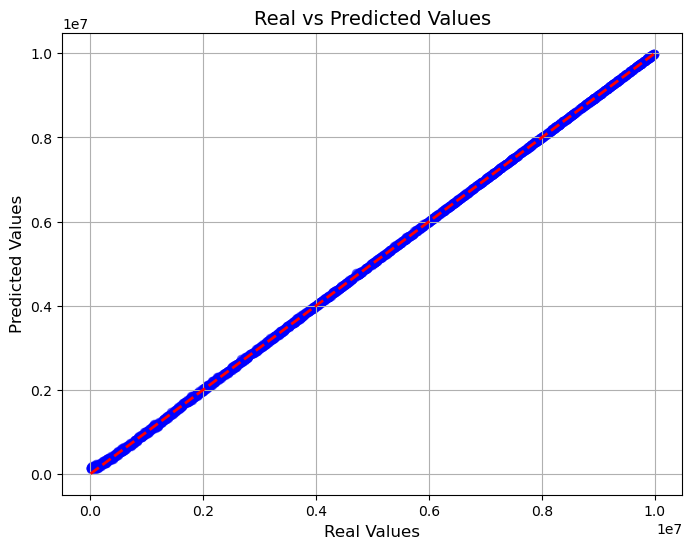

In [11]:
# Predictions vs real values plot
plt.figure(figsize=(8, 6))
plt.scatter(df_test_y, y_pred_test, color='blue', alpha=0.5)
plt.plot([df_test_y.min(), df_test_y.max()], [df_test_y.min(), df_test_y.max()], 'r--', lw=2)  # Línea de igualdad

# Añadir títulos y etiquetas
plt.title('Real vs Predicted Values', fontsize=14)
plt.xlabel('Real Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)

# Mostrar el gráfico
plt.show()